In [64]:
import pickle
import scipy.io 
import matplotlib.pyplot as plt
import numpy as np

In [13]:
with open('SBM2_raw_data_V5.pickle', 'rb') as f:
        FP, AMP, NR, Epoch = pickle.load(f)
with open('SBM2_timepos_data_V5.pickle', 'rb') as f:
    time, rua = pickle.load(f)


In [57]:
et = scipy.io.loadmat('et.mat')['et']
et = et[0,:]*1e9

In [35]:
rua = scipy.io.loadmat('rua.mat')['rua']
rua = rua[0,:]

In [69]:
with open('SBM2_raw_data_V6.pickle', 'wb') as f:
    pickle.dump([FP, AMP, NR], f)
with open('SBM2_timepos_data_V6.pickle', 'wb') as f:
    pickle.dump([time, rua, Epoch, et], f)

In [106]:
with open('SBM2_raw_data_V6.pickle', 'rb') as f:
    FP, AMP, NR = pickle.load(f)
with open('SBM2_timepos_data_V6.pickle', 'rb') as f:
    time, rua, Epoch, et = pickle.load(f)
    

In [120]:
with open('SBM2_raw_data_V6.pickle', 'wb') as f:
    pickle.dump([FP, AMP, NR], f)
with open('SBM2_timepos_data_V6.pickle', 'wb') as f:
    pickle.dump([time, rua, Epoch, et], f)

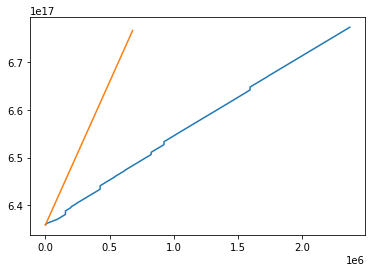

In [38]:
plt.plot(Epoch)
plt.plot(et*1e9)

In [107]:
rua.shape

(2373729,)

In [ ]:
target = 2330067

In [108]:
FP.shape

(2330067,)

In [110]:
AMP.shape

(2330067,)

In [111]:
NR.shape

(2330067,)

In [117]:
time = time[0:2330067]
time.shape

(2330067,)

In [118]:
rua = rua[0:2330067]
rua.shape

(2330067,)

In [119]:
Epoch = Epoch[0:2330067]
Epoch.shape

(2330067,)

In [68]:
et[365288]

6.577829541825695e+17

In [100]:
import cdflib
import datetime as dt
time = cdflib.cdfepoch.breakdown_tt2000(Epoch)
for i in range(len(time)):
    time[i] = dt.datetime(time[i][0], time[i][1],time[i][2],time[i][3],time[i][4],time[i][5],time[i][6])

In [73]:
def find_nearest(array, value,rua):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return rua[idx]

In [67]:
find_nearest(et, Epoch[1200000])

365288

In [86]:
a = np.zeros(shape = 100000)
for i in range(100000):
    a[i] = find_nearest(et,epochrs[i],rua)

In [84]:
import scipy.signal as ree

In [85]:
epochrs = ree.resample(Epoch, 100000)

In [87]:
ars = ree.resample(a,2373729)

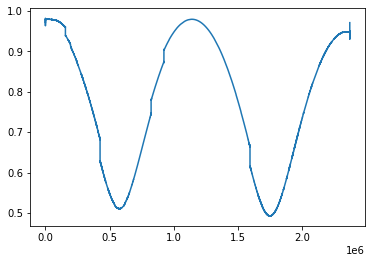

In [91]:
plt.plot(rua)